## In this script we are going to build a database with word frequencies, and then add socioeconomic data. We are going to use the example of testing Big Numbers (>4) vs. small numbers (2,3,4)

## Step 1: build word frequencies

In [1]:
#Bags of The Words

small_numbers = ['two','three','four']
big_numbers = ['five','six','seven','eight','nine','ten']


In [2]:
# ## We are going to use a database of movies, and will retrieve the data from IMDB
# !pip install IMDbPY
# import imdb
# ia = imdb.IMDb(accessSystem='http')

In [3]:
## Here we collect the relevant data to generate a dataset with word frequencies
## For each text in the corpus, we collect author, year, title, and the tokenized text

import os
from os import path

## Collect preprocessed texts in txt format
root_folder = os.getcwd()
print(root_folder)

## this is a list which will store the relevant data to the dataframe
data_to_df =[]

## This iterates over your path, folders and subfolders looking for txt files
for path, subdirs, files in os.walk(root_folder):
    for file in files:

        ## list where we will store the relevant data for this text 
        text_data = []

        ## list in which we will stored tokenized text
        tokenized_text = []
        
        if '.txt' in file[-4:] and 'model' not in file:
            print(file)

            ## we can obtain author, year, title from filename
            author = file.split('-')[0]
            year = int(file.split('-')[1])
            title = file.split('-')[2]
            
            ## we get the full path and open the file
            name = os.path.join(path, file)
            file_text = open(name, encoding = 'utf-8',errors='ignore').read()

            ## this creates the list of paragraphs - lines
            text_list_paragraphs = file_text.split('\n')

            ## this will clean the paragraphs further -- getting read of \r at the end of the line
            for paragraph in text_list_paragraphs:
                #print (paragraph)
                
                paragraph = paragraph.replace('\r', '')

                ## we add the paragraphs to the word2vec input list
                tokenized_text += paragraph.split(' ')

            ## store relevant info into a variable
            text_data = [author,year,title,list(filter(None,tokenized_text)),list(filter(None,text_list_paragraphs))]#[author,year,title,tokenized_text]

            ## store the relevant data of each text into a general list of lists
            data_to_df += [text_data]

C:\Users\azeez\Documents\EM3 SUBMISSION FOLDER\scripts
aaditya-2012-Climate responsive.txt
abdel-2013-Ski.txt
abdul-2012-Mod.txt
abo-2012-Microaerobic.txt
Abu-2009-compression.txt
afonso-2013-Tracer gas.txt
afrasiabian-2019-analysis.txt
agrawal-2011-Flow characteristics.txt
agrawal-2012-Study.txt
agyeni-2012-Experimenta.txt
ahmad-2016-Investigation of the ef.txt
ahmadi-2016-Applying.txt
ahmadi-2016-Thermodynamic anal.txt
ahmadi-2020-Portfolio optimization.txt
ahmed-2018-Design methodology.txt
Ajay-2009-simultaneous.txt
akyuz-2010-Energetic.txt
alamier-2020- Synthesi.txt
alayietal-2020-Energy.txt
alayietal-2020-Technical and environmental.txt
aldali-2011-energetic.txt
aldali-2011-Solar absorber tube analysis.txt
aleknaviciute-2012-Plasma assis.txt
aleknaviviute-2016-Towards clean.txt
alexander-2013-solid sorption.txt
ali ahmadi-2016-Modeling solubility of carb.txt
alkhalidi etal-2019-Energy efficient cooling.txt
alkhalidi etal-2020-Using Wood.txt
alkhalidi-2020- Do green buildings.txt
A

Lee etal-2017-Cooling combinations.txt
lee etal-2020-Experimental.txt
lee etal-2020-Performance estimation.txt
li and dai-2019-Energy.txt
li and liang-2018-The economi.txt
li and shuan-2020-Research on freq.txt
li and yang-2010-Energy and exergy analysis.txt
li and zhang-2020-Developing the tran.txt
li and zhang-2020-Ecological efficiency.txt
li etal-2010-hybrid solar electricity system.txt
li etal-2012-Experimental study on the di.txt
li etal-2016-feasible energy saving analysis.txt
li etal-2016-Performance.txt
li etal-2016-Thermal analysis.txt
li etal-2019-Effect of design.txt
li etal-2019-low power data.txt
li-2020-Analysis on.txt
lian etal-2016-Simultaneous synthes.txt
liang and shi-2020-Efficiency evaluatio.txt
liao and wang-2012-Performance based lo.txt
lim etal-2013-Design config.txt
lin etal-2011-Ammonia water absorption cycle.txt
lin etal-2018-Experimental study on im.txt
lin-2016-Stratum ventilation a low c.txt
ling etal-2013-The numerical s.txt
Lingen-2013-cycle.txt
lisha et

yali-2014-Simulation.txt
yan etal-2020-energy.txt
yandri-2018-Uniformity.txt
Yang and Yutong-2007-photovoltaic application.txt
Yang etal-2013-ecobuilding.txt
yang-2012-heat.txt
yang-2012-Performance.txt
yang-2020-policy.txt
Yee Chow-2009-zero carbon targets.txt
yi etal-2009-atriums in subtropical climate.txt
Yolanda-2020-determining.txt
you-2020-Influences.txt
yu-2018-Theeconomic.txt
Yuanlong etal-2020-heating systems for.txt
zeinelabdein-2018-Free.txt
zeng-2012-Problems.txt
zhai-2016-Sensitivity.txt
zhan-2010-Numerical.txt
zhang etal-2010-performanc.txt
zhang etal-2012-sordption.txt
Zhang etal-2015-heat transfer of energy.txt
Zhang etal-2016-indoor air thermal.txt
Zhang etal-2017-liquid dessicant cycle.txt
Zhang etal-2018-revolutio.txt
zhang-2012-Enhanced Hea.txt
Zhang-2020-reconfigurable equilibrium.txt
zhang-2020-Res.txt
zhangetal-2012-Gascleaning.txt
zhangetal-2013-Theoretical.txt
zhangetal-2017-Annual.txt
zhangetal-2020-Capacity.txt
zhangetal-2020-Discrete.txt
Zhao etal-2008-power

In [4]:
for item in(data_to_df):
  print(item)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['zhang etal', 2012, 'sordption.txt', ['Sorption,', 'permeation', 'and', 'selective', 'transport', 'of', 'moisture/VOCs', 'through', 'a', 'CA', 'membrane', 'for', 'total', 'heat', 'recovery', '..............................................................................................................................................................', 'Xin-Ru', 'Zhang', '1,', 'Li-Zhi', 'Zhang', '1,2', '*', 'and', 'Li-Xia', 'Pei', '1', '1', 'Key', 'Laboratory', 'of', 'Enhanced', 'Heat', 'Transfer', 'and', 'Energy', 'Conservation', 'of', 'Education', 'Ministry,', 'School', 'of', 'Chemistry', 'and', 'Chemical', 'Engineering,', 'South', 'China', 'University', 'of', 'Technology,', 'Guangzhou', '510640,', 'China;', '2State', 'Key', 'Laboratory', 'of', 'Subtropical', 'Building', 'Science,', 'South', 'China', 'University', 'of', 'Technology,', 'Guangzhou', '510640,', 'China', 'Abstract', 'This', 'article', 'studies', 'in', 'detail', 'the', 'permeation', 'properties', 'of', 'highly', 'permeabl

In [5]:
for item in data_to_df[1]:
  print(item)

abdel
2013
Ski.txt
['Skills', 'development', 'for', 'retrofitting', 'a', 'historic', 'listed', 'building', 'in', 'Scotland', '..............................................................................................................................................................', '.............................................................................................................................................', 'Abstract', 'With', 'the', 'current', 'aim', 'for', 'a', 'low', 'carbon', 'economy', 'in', 'Scotland,', 'it', 'becomes', 'imperative', 'to', 'ensure', 'that', 'there', 'are', 'adequate', 'workforce', 'skills', 'available', 'to', 'support', 'meeting', 'this', 'aspiration.', 'As', 'such,', 'the', 'Scottish', 'Government', 'has', 'developed', 'a', 'low', 'carbon', 'skills', 'agenda', 'that', 'emphasizes', 'rapidly', 'developing', 'and', 'delivering', 'specialist', 'skills', 'that', 'are', 'needed', 'to', 'enable', 'the', 'adoption', 'of', 'new', 'technologies.', 'D

In [6]:
import pandas as pd

# Create the pandas DataFrame
df = pd.DataFrame(data_to_df, columns = ['author', 'year','title','tokenized_text','lines'])
  
# print dataframe.
df

,author,year,title,tokenized_text,lines
0,aaditya,2012,Climate responsive.txt,"[Climate-responsive, integrability, of, buildi...","[Climate-responsive integrability, of building..."
1,abdel,2013,Ski.txt,"[Skills, development, for, retrofitting, a, hi...",[Skills development for retrofitting a histori...
2,abdul,2012,Mod.txt,"[Modeling, of, a, maximum, power, point, track...","[Modeling of a maximum power point tracker, fo..."
3,abo,2012,Microaerobic.txt,"[Microaerobic, dark, fermentative, hydrogen, p...","[Microaerobic dark fermentative hydrogen, prod..."
4,Abu,2009,compression.txt,"[New, technique, of, air-cooled, absorption, s...","[New technique of air-cooled absorption, syste..."
...,...,...,...,...,...
602,zhu,2020,The influence.txt,"[Cheng, Zhu1,2,, *, 1, Hohai, University,, Col...","[Cheng Zhu1,2, *, 1, Hohai University, College..."
603,Zhuetal,2020,aerolastic.txt,"[Aerodynamic, and, structural, optimization, o...","[Aerodynamic and structural optimization of, w..."
604,zishang,2012,Assessment.txt,"[Assessment, of, the, technical, potential, fo...","[Assessment of the technical potential for, mu..."
605,Zisisetal,2006,heat.txt,"[Investigation, of, the, performance, of, heat...","[Investigation of the performance of heat, pip..."


In [7]:
## Create a function to calculate word counts of a particular bag of words
from collections import Counter

def count_BOW(bag_of_words,tokenized_text):
  count_occurences_of_each_word = Counter(tokenized_text)
  #print(count_occurences_of_each_word)

  total_bag_count = 0
  for word in bag_of_words:
    #print(word, count_occurences_of_each_word[word])

    total_bag_count += count_occurences_of_each_word[word]
  return(total_bag_count)


In [8]:
## count all the words in each text pertaining to the bag of words climate and change

list_smallnumbers_counts=[]
list_bignumbers_counts=[]

for text in df['tokenized_text']:
  small_count = count_BOW(small_numbers, text)
  list_smallnumbers_counts+=[small_count]

  big_count = count_BOW(big_numbers, text)
  list_bignumbers_counts+=[big_count]

In [9]:
## Add the counts of bags of words to the dataFrame

df['Big_numbers'] = list_bignumbers_counts
df['Small_numbers'] = list_smallnumbers_counts

df

,author,year,title,tokenized_text,lines,Big_numbers,Small_numbers
0,aaditya,2012,Climate responsive.txt,"[Climate-responsive, integrability, of, buildi...","[Climate-responsive integrability, of building...",0,4
1,abdel,2013,Ski.txt,"[Skills, development, for, retrofitting, a, hi...",[Skills development for retrofitting a histori...,1,3
2,abdul,2012,Mod.txt,"[Modeling, of, a, maximum, power, point, track...","[Modeling of a maximum power point tracker, fo...",4,1
3,abo,2012,Microaerobic.txt,"[Microaerobic, dark, fermentative, hydrogen, p...","[Microaerobic dark fermentative hydrogen, prod...",0,6
4,Abu,2009,compression.txt,"[New, technique, of, air-cooled, absorption, s...","[New technique of air-cooled absorption, syste...",0,2
...,...,...,...,...,...,...,...
602,zhu,2020,The influence.txt,"[Cheng, Zhu1,2,, *, 1, Hohai, University,, Col...","[Cheng Zhu1,2, *, 1, Hohai University, College...",0,2
603,Zhuetal,2020,aerolastic.txt,"[Aerodynamic, and, structural, optimization, o...","[Aerodynamic and structural optimization of, w...",4,20
604,zishang,2012,Assessment.txt,"[Assessment, of, the, technical, potential, fo...","[Assessment of the technical potential for, mu...",1,9
605,Zisisetal,2006,heat.txt,"[Investigation, of, the, performance, of, heat...","[Investigation of the performance of heat, pip...",0,2


In [10]:
## Calculate a Big to Small ratio

df['big-small-ratio'] = (df['Big_numbers'] - df['Small_numbers'])/(df['Big_numbers'] + df['Small_numbers'])

df

,author,year,title,tokenized_text,lines,Big_numbers,Small_numbers,big-small-ratio
0,aaditya,2012,Climate responsive.txt,"[Climate-responsive, integrability, of, buildi...","[Climate-responsive integrability, of building...",0,4,-1.000000
1,abdel,2013,Ski.txt,"[Skills, development, for, retrofitting, a, hi...",[Skills development for retrofitting a histori...,1,3,-0.500000
2,abdul,2012,Mod.txt,"[Modeling, of, a, maximum, power, point, track...","[Modeling of a maximum power point tracker, fo...",4,1,0.600000
3,abo,2012,Microaerobic.txt,"[Microaerobic, dark, fermentative, hydrogen, p...","[Microaerobic dark fermentative hydrogen, prod...",0,6,-1.000000
4,Abu,2009,compression.txt,"[New, technique, of, air-cooled, absorption, s...","[New technique of air-cooled absorption, syste...",0,2,-1.000000
...,...,...,...,...,...,...,...,...
602,zhu,2020,The influence.txt,"[Cheng, Zhu1,2,, *, 1, Hohai, University,, Col...","[Cheng Zhu1,2, *, 1, Hohai University, College...",0,2,-1.000000
603,Zhuetal,2020,aerolastic.txt,"[Aerodynamic, and, structural, optimization, o...","[Aerodynamic and structural optimization of, w...",4,20,-0.666667
604,zishang,2012,Assessment.txt,"[Assessment, of, the, technical, potential, fo...","[Assessment of the technical potential for, mu...",1,9,-0.800000
605,Zisisetal,2006,heat.txt,"[Investigation, of, the, performance, of, heat...","[Investigation of the performance of heat, pip...",0,2,-1.000000


<AxesSubplot:xlabel='year', ylabel='big-small-ratio'>

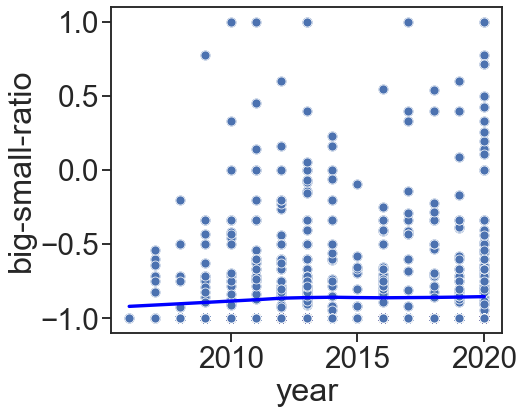

In [11]:
## Now we plot a time series using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

df2= df.loc[df["year"] > 1950]
            
#%matplotlib inline
sns.set()
sns.set_context("talk",font_scale=1.8)
sns.set_style("white")
sns.set_style("ticks")
plt.figure(figsize=(7, 6))

sns.regplot(data=df2, lowess=True, line_kws={"color": "blue"}, x="year", y="big-small-ratio")
sns.scatterplot(data=df2, x="year", y="big-small-ratio", ci=None)



In [12]:
df2.to_csv('climate_numbers.csv')

## Step 2: Add socioeconomic data 

In [13]:
### READ CSVS AS DATA FRAMES
base_dir1 = os.getcwd()

list_of_ratios = pd.read_csv(base_dir1 +'/climate_numbers.csv')

owid_data  = pd.read_csv(base_dir1 +'/OwidDataGlobal_edited.csv')




In [14]:
list_of_ratios

,Unnamed: 0,author,year,title,tokenized_text,lines,Big_numbers,Small_numbers,big-small-ratio
0,0,aaditya,2012,Climate responsive.txt,"['Climate-responsive', 'integrability', 'of', ...","['Climate-responsive integrability', 'of build...",0,4,-1.000000
1,1,abdel,2013,Ski.txt,"['Skills', 'development', 'for', 'retrofitting...",['Skills development for retrofitting a histor...,1,3,-0.500000
2,2,abdul,2012,Mod.txt,"['Modeling', 'of', 'a', 'maximum', 'power', 'p...","['Modeling of a maximum power point tracker', ...",4,1,0.600000
3,3,abo,2012,Microaerobic.txt,"['Microaerobic', 'dark', 'fermentative', 'hydr...","['Microaerobic dark fermentative hydrogen', 'p...",0,6,-1.000000
4,4,Abu,2009,compression.txt,"['New', 'technique', 'of', 'air-cooled', 'abso...","['New technique of air-cooled absorption', 'sy...",0,2,-1.000000
...,...,...,...,...,...,...,...,...,...
602,602,zhu,2020,The influence.txt,"['Cheng', 'Zhu1,2,', '*', '1', 'Hohai', 'Unive...","['Cheng Zhu1,2, *', '1', 'Hohai University, Co...",0,2,-1.000000
603,603,Zhuetal,2020,aerolastic.txt,"['Aerodynamic', 'and', 'structural', 'optimiza...","['Aerodynamic and structural optimization of',...",4,20,-0.666667
604,604,zishang,2012,Assessment.txt,"['Assessment', 'of', 'the', 'technical', 'pote...","['Assessment of the technical potential for', ...",1,9,-0.800000
605,605,Zisisetal,2006,heat.txt,"['Investigation', 'of', 'the', 'performance', ...","['Investigation of the performance of heat', '...",0,2,-1.000000


In [15]:
owid_data

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,OWID_WRL,World,1750,9.351,NaN,0.00,0.000,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7.456644e+08,NaN,NaN,NaN,NaN
1,OWID_WRL,World,1751,9.351,NaN,0.00,0.000,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OWID_WRL,World,1752,9.354,NaN,0.04,0.004,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OWID_WRL,World,1753,9.354,NaN,0.00,0.000,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OWID_WRL,World,1754,9.358,NaN,0.04,0.004,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,OWID_WRL,World,2016,35452.459,35452.459,-0.12,-43.947,0.0,4.750,4.750,...,6.613,8550.06,1.146,3054.0,0.409,7.464344e+09,1.070000e+14,152944.938,20490.955,1.429
267,OWID_WRL,World,2017,35925.738,35925.738,1.33,473.278,0.0,4.760,4.760,...,NaN,NaN,NaN,NaN,NaN,7.548183e+09,1.100000e+14,155672.784,20624.761,NaN
268,OWID_WRL,World,2018,36646.140,36646.140,2.01,720.402,0.0,4.802,4.802,...,NaN,NaN,NaN,NaN,NaN,7.631091e+09,1.140000e+14,160063.686,20975.203,NaN
269,OWID_WRL,World,2019,36702.503,36702.503,0.15,56.363,0.0,4.758,4.758,...,NaN,NaN,NaN,NaN,NaN,7.713468e+09,NaN,162194.290,21027.415,NaN


In [16]:
## function to add the corresponding socioeconomic value

def add_soc (year,var, dataset):

    var_year = list(owid_data[var][1:])    
    dictionary_var = dict(zip(year, var_year))
    var_list = []
    for item in dataset[0:]['year']:
        print(item)
        var_list += [dictionary_var[item]]
    new_list_of_ratios[var] =var_list  

In [17]:
## add the corresponding socioeconomic value

new_list_of_ratios= list_of_ratios[:]
    
year = list(owid_data['year'][1:])   

list_of_vars = ['co2', 'co2_growth_prct', 'co2_growth_abs','co2_per_capita','cumulative_co2','coal_co2','coal_co2_per_capita','cumulative_coal_co2']
for var in list_of_vars:
    add_soc(year, var, list_of_ratios[:])


2012
2013
2012
2012
2009
2013
2019
2011
2012
2012
2016
2016
2016
2020
2018
2009
2010
2020
2020
2020
2011
2011
2012
2016
2013
2016
2019
2020
2020
2014
2020
2020
2011
2019
2020
2010
2018
2019
2019
2010
2016
2016
2019
2014
2010
2019
2020
2016
2013
2018
2012
2012
2013
2016
2016
2015
2020
2013
2013
2016
2016
2019
2020
2015
2013
2008
2012
2017
2020
2009
2020
2020
2018
2008
2013
2016
2011
2010
2009
2013
2008
2017
2020
2012
2019
2012
2013
2013
2013
2018
2008
2012
2013
2015
2012
2019
2018
2013
2009
2020
2008
2009
2010
2010
2012
2012
2012
2012
2012
2016
2016
2018
2018
2014
2014
2013
2012
2009
2020
2008
2010
2013
2014
2012
2013
2013
2018
2009
2011
2013
2013
2016
2020
2016
2011
2013
2012
2013
2013
2011
2012
2019
2017
2011
2016
2018
2018
2012
2017
2016
2020
2013
2014
2014
2019
2008
2020
2020
2017
2018
2012
2017
2020
2013
2010
2010
2013
2011
2017
2012
2016
2009
2010
2015
2010
2013
2018
2009
2014
2013
2017
2016
2020
2017
2012
2012
2016
2012
2012
2018
2013
2019
2009
2009
2018
2020
2014
2010
2011
2019


C:\Users\azeez\AppData\Local\Temp/ipykernel_17464/58326469.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_list_of_ratios[var] =var_list


2020
2012
2014
2014
2014
2015
2013
2016
2013
2012
2020
2018
2018
2018
2020
2012
2011
2009
2014
2012
2009
2010
2012
2013
2009
2006
2008
2009
2010
2010
2009
2012
2014
2013
2015
2009
2010
2013
2013
2017
2020
2010
2008
2007
2013
2019
2018
2011
2020
2009
2013
2013
2020
2010
2010
2014
2012
2020
2020
2012
2019
2020
2013
2018
2012
2013
2016
2008
2013
2018
2007
2007
2013
2013
2017
2020
2020
2019
2018
2020
2010
2020
2020
2010
2012
2016
2016
2016
2019
2019
2020
2016
2020
2012
2013
2011
2018
2016
2013
2013
2018
2009
2010
2008
2013
2018
2009
2009
2019
2010
2018
2010
2010
2013
2013
2010
2018
2011
2010
2010
2010
2010
2018
2013
2011
2020
2011
2008
2009
2020
2018
2013
2019
2018
2013
2012
2016
2011
2010
2017
2011
2012
2010
2007
2016
2017
2009
2011
2014
2016
2016
2016
2019
2019
2019
2013
2011
2011
2020
2018
2019
2020
2018
2011
2013
2012
2010
2010
2011
2013
2019
2013
2009
2009
2020
2020
2012
2018
2013
2016
2020
2016
2019
2013
2016
2012
2013
2012
2008
2013
2015
2016
2009
2014
2012
2009
2013
2007
2007
2018


In [18]:
new_list_of_ratios

,Unnamed: 0,author,year,title,tokenized_text,lines,Big_numbers,Small_numbers,big-small-ratio,co2,co2_growth_prct,co2_growth_abs,co2_per_capita,cumulative_co2,coal_co2,coal_co2_per_capita,cumulative_coal_co2
0,0,aaditya,2012,Climate responsive.txt,"['Climate-responsive', 'integrability', 'of', ...","['Climate-responsive integrability', 'of build...",0,4,-1.000000,34974.075,1.47,505.624,4.908,1410676.204,14949.697,2.098,671456.267
1,1,abdel,2013,Ski.txt,"['Skills', 'development', 'for', 'retrofitting...",['Skills development for retrofitting a histor...,1,3,-0.500000,35283.025,0.88,308.950,4.893,1445959.229,15042.880,2.086,686499.147
2,2,abdul,2012,Mod.txt,"['Modeling', 'of', 'a', 'maximum', 'power', 'p...","['Modeling of a maximum power point tracker', ...",4,1,0.600000,34974.075,1.47,505.624,4.908,1410676.204,14949.697,2.098,671456.267
3,3,abo,2012,Microaerobic.txt,"['Microaerobic', 'dark', 'fermentative', 'hydr...","['Microaerobic dark fermentative hydrogen', 'p...",0,6,-1.000000,34974.075,1.47,505.624,4.908,1410676.204,14949.697,2.098,671456.267
4,4,Abu,2009,compression.txt,"['New', 'technique', 'of', 'air-cooled', 'abso...","['New technique of air-cooled absorption', 'sy...",0,2,-1.000000,31607.042,-1.44,-462.402,4.599,1307890.377,13067.147,1.901,627754.514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,zhu,2020,The influence.txt,"['Cheng', 'Zhu1,2,', '*', '1', 'Hohai', 'Unive...","['Cheng Zhu1,2, *', '1', 'Hohai University, Co...",0,2,-1.000000,34807.259,-5.16,-1895.244,4.465,1696524.177,13976.098,1.793,788362.044
603,603,Zhuetal,2020,aerolastic.txt,"['Aerodynamic', 'and', 'structural', 'optimiza...","['Aerodynamic and structural optimization of',...",4,20,-0.666667,34807.259,-5.16,-1895.244,4.465,1696524.177,13976.098,1.793,788362.044
604,604,zishang,2012,Assessment.txt,"['Assessment', 'of', 'the', 'technical', 'pote...","['Assessment of the technical potential for', ...",1,9,-0.800000,34974.075,1.47,505.624,4.908,1410676.204,14949.697,2.098,671456.267
605,605,Zisisetal,2006,heat.txt,"['Investigation', 'of', 'the', 'performance', ...","['Investigation of the performance of heat', '...",0,2,-1.000000,30583.530,3.31,980.753,4.617,1212720.149,12222.242,1.845,588641.324


In [19]:
  new_df = new_list_of_ratios.drop(['tokenized_text','lines'], axis=1)
  new_df

,Unnamed: 0,author,year,title,Big_numbers,Small_numbers,big-small-ratio,co2,co2_growth_prct,co2_growth_abs,co2_per_capita,cumulative_co2,coal_co2,coal_co2_per_capita,cumulative_coal_co2
0,0,aaditya,2012,Climate responsive.txt,0,4,-1.000000,34974.075,1.47,505.624,4.908,1410676.204,14949.697,2.098,671456.267
1,1,abdel,2013,Ski.txt,1,3,-0.500000,35283.025,0.88,308.950,4.893,1445959.229,15042.880,2.086,686499.147
2,2,abdul,2012,Mod.txt,4,1,0.600000,34974.075,1.47,505.624,4.908,1410676.204,14949.697,2.098,671456.267
3,3,abo,2012,Microaerobic.txt,0,6,-1.000000,34974.075,1.47,505.624,4.908,1410676.204,14949.697,2.098,671456.267
4,4,Abu,2009,compression.txt,0,2,-1.000000,31607.042,-1.44,-462.402,4.599,1307890.377,13067.147,1.901,627754.514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,zhu,2020,The influence.txt,0,2,-1.000000,34807.259,-5.16,-1895.244,4.465,1696524.177,13976.098,1.793,788362.044
603,603,Zhuetal,2020,aerolastic.txt,4,20,-0.666667,34807.259,-5.16,-1895.244,4.465,1696524.177,13976.098,1.793,788362.044
604,604,zishang,2012,Assessment.txt,1,9,-0.800000,34974.075,1.47,505.624,4.908,1410676.204,14949.697,2.098,671456.267
605,605,Zisisetal,2006,heat.txt,0,2,-1.000000,30583.530,3.31,980.753,4.617,1212720.149,12222.242,1.845,588641.324


In [21]:
### SAVE LIST AS CSV ###

new_df.to_csv('Numbers_freq_climate_SOCI.csv') 